<a href="https://colab.research.google.com/github/TanV-04/Deepfake_LSTM/blob/main/lstm_deepfake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install numpy pandas tensorflow opencv-python matplotlib scikit-learn


In [2]:
!pip install tqdm

importing the dataset from kaggle

other datasets:
<br />
- https://www.kaggle.com/code/krooz0/deep-fake-detection-on-images-and-videos/notebook
- https://www.kaggle.com/code/anlthms/deepfake-example-video-clips
- https://www.kaggle.com/datasets/sanikatiwarekar/deep-fake-detection-dfd-entire-original-dataset


import .png dataset

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nanduncs/1000-deepfake-videos")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/nanduncs/1000-deepfake-videos/versions/1


import .mp4 dataset

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sanikatiwarekar/deep-fake-detection-dfd-entire-original-dataset")

print("Path to dataset files:", path)

100%|██████████| 22.5G/22.5G [04:43<00:00, 85.1MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/sanikatiwarekar/deep-fake-detection-dfd-entire-original-dataset/versions/1


checking if the files exist (code for .png dataset)

In [ ]:
import os

# Define the path to the main dataset
dataset_path = '/root/.cache/kagglehub/datasets/nanduncs/1000-deepfake-videos/versions/1'

# Define the path to the '1000_videos' subdirectory
videos_path = os.path.join(dataset_path, '1000_videos')

# Define the paths to the 'real' and 'fake' subdirectories
real_path = os.path.join(videos_path, 'Real')
fake_path = os.path.join(videos_path, 'Fake')

# List all PNG files in the 'real' folder
real_files = [os.path.join('Real', file) for file in os.listdir(real_path) if file.endswith('.png')]

# List all PNG files in the 'fake' folder
fake_files = [os.path.join('Fake', file) for file in os.listdir(fake_path) if file.endswith('.png')]

# Combine the two lists
all_files = real_files + fake_files

# Display the first few files to verify the structure
print(f"Found {len(all_files)} PNG files. First few files:", all_files[:10])


Found 16433 PNG files. First few files: ['Real/id4_0000_2.png', 'Real/168_17.png', 'Real/id8_0001_13.png', 'Real/060_12.png', 'Real/id25_0008_5.png', 'Real/049_5.png', 'Real/113_5.png', 'Real/165_14.png', 'Real/id1_0006_1.png', 'Real/199_11.png']


check if the files exist (.mp4 dataset)

In [4]:
# import os

# # Define the path to the main dataset
# dataset_path = '/root/.cache/kagglehub/datasets/sanikatiwarekar/deep-fake-detection-dfd-entire-original-dataset/'

# # Define the paths to the subdirectories
# manipulated_path = os.path.join(dataset_path, 'DFD_manipulated_sequences/DFD_manipulated_sequences')
# original_path = os.path.join(dataset_path, 'DFD_original_sequences')

# # Check and list all .mp4 files in 'dfd_manipulated_sequences'
# manipulated_files = []
# for root, dirs, files in os.walk(manipulated_path):
#     for file in files:
#         if file.endswith('.mp4'):
#             manipulated_files.append(os.path.join(root, file))

# # Check and list all .mp4 files in 'dfd_original_sequences'
# original_files = []
# for root, dirs, files in os.walk(original_path):
#     for file in files:
#         if file.endswith('.mp4'):
#             original_files.append(os.path.join(root, file))

# # Combine the lists of manipulated and original .mp4 files
# all_files = manipulated_files + original_files

# # Display the number of files and the first few files
# print(f"Found {len(all_files)} MP4 files. First few files:", all_files[:10])


import os

# Define the path to the main dataset
dataset_path = '/root/.cache/kagglehub/datasets/sanikatiwarekar/deep-fake-detection-dfd-entire-original-dataset/'

# Define the path to the 'versions/1' subdirectory
versions_1_path = os.path.join(dataset_path, 'versions', '1')

# Check the contents of the 'versions/1' directory
print(f"Contents of versions/1 folder: {os.listdir(versions_1_path)}")

# Define the path to the main dataset
dataset_path = '/root/.cache/kagglehub/datasets/sanikatiwarekar/deep-fake-detection-dfd-entire-original-dataset/'

# Define the path to the 'versions/1' subdirectory
versions_1_path = os.path.join(dataset_path, 'versions', '1')

# Define the paths to the 'DFD_manipulated_sequences' and 'DFD_original_sequences'
manipulated_path = os.path.join(versions_1_path, 'DFD_manipulated_sequences')
original_path = os.path.join(versions_1_path, 'DFD_original sequences')

# List all .mp4 files in 'DFD_manipulated_sequences'
manipulated_files = []
for root, dirs, files in os.walk(manipulated_path):
    for file in files:
        if file.lower().endswith('.mp4'):  # Case-insensitive check for .mp4
            manipulated_files.append(os.path.join(root, file))

# List all .mp4 files in 'DFD_original_sequences'
original_files = []
for root, dirs, files in os.walk(original_path):
    for file in files:
        if file.lower().endswith('.mp4'):  # Case-insensitive check for .mp4
            original_files.append(os.path.join(root, file))

# Combine the lists of manipulated and original .mp4 files
all_files = manipulated_files + original_files

# Display the number of files and the first few files
print(f"Found {len(all_files)} MP4 files. First few files:", all_files[:10])


Contents of versions/1 folder: ['DFD_original sequences', 'DFD_manipulated_sequences']
Found 3431 MP4 files. First few files: ['/root/.cache/kagglehub/datasets/sanikatiwarekar/deep-fake-detection-dfd-entire-original-dataset/versions/1/DFD_manipulated_sequences/DFD_manipulated_sequences/02_13__walking_outside_cafe_disgusted__CP5HFV3K.mp4', '/root/.cache/kagglehub/datasets/sanikatiwarekar/deep-fake-detection-dfd-entire-original-dataset/versions/1/DFD_manipulated_sequences/DFD_manipulated_sequences/12_07__walk_down_hall_angry__KAG65PEE.mp4', '/root/.cache/kagglehub/datasets/sanikatiwarekar/deep-fake-detection-dfd-entire-original-dataset/versions/1/DFD_manipulated_sequences/DFD_manipulated_sequences/20_13__walk_down_hall_angry__43KAHOT2.mp4', '/root/.cache/kagglehub/datasets/sanikatiwarekar/deep-fake-detection-dfd-entire-original-dataset/versions/1/DFD_manipulated_sequences/DFD_manipulated_sequences/03_27__walking_and_outside_surprised__KWGI1LSZ.mp4', '/root/.cache/kagglehub/datasets/sanik

creating a dataframe - for easily splitting the data into training and testing datasets (.png dataset)

In [ ]:
import pandas as pd

# Create labels: 'real' for files in 'Real' and 'fake' for files in 'Fake'
labels = ['real'] * len(real_files) + ['fake'] * len(fake_files)

# Combine the filenames and labels into a DataFrame
df = pd.DataFrame({
    'file': all_files,
    'label': labels
})

df = df.sample(10000, random_state=42)

# Display the first few rows of the DataFrame
print(df)


                            file label
12560   Fake/id0_id20_0006_7.png  fake
16228         Fake/177_211_9.png  fake
4816             Real/133_22.png  real
6877              Real/039_3.png  real
6601         Real/id0_0006_2.png  real
...                          ...   ...
10164         Fake/159_175_5.png  fake
4683        Real/id19_0000_4.png  real
15402    Fake/id0_id1_0001_6.png  fake
13909   Fake/id1_id31_0000_0.png  fake
11830  Fake/id0_id21_0003_15.png  fake

[10000 rows x 2 columns]


creating a dataframe (.mp4 dataset)

In [6]:

import pandas as pd

labels = ['real'] * len(original_files) + ['fake'] * len(manipulated_files)

# Combine the filenames and labels into a DataFrame
df = pd.DataFrame({
    'file': all_files,
    'label': labels
})

# Print the total number of files
print(f"Total number of files: {len(all_files)}")

# Sample all files if there are less than 10,000
sample_size = min(10000, len(all_files))  # Ensure we don't sample more than available

# Sample files randomly
df = df.sample(sample_size, random_state=42)

# Display the first few rows of the DataFrame
print(df.head())

Total number of files: 3431
                                                   file label
1575  /root/.cache/kagglehub/datasets/sanikatiwareka...  fake
1949  /root/.cache/kagglehub/datasets/sanikatiwareka...  fake
3241  /root/.cache/kagglehub/datasets/sanikatiwareka...  fake
3143  /root/.cache/kagglehub/datasets/sanikatiwareka...  fake
1861  /root/.cache/kagglehub/datasets/sanikatiwareka...  fake


preprocess the dataset (laptop keeps running out of memory here)



In [ ]:
# import cv2
# import numpy as np
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.utils import to_categorical

# # Parameters
# IMG_SIZE = 32  # Resize images to 32x32
# SEQUENCE_LENGTH = 10  # Number of frames per sequence

# # Function to preprocess images
# def preprocess_image(file_path):
#     img = cv2.imread(file_path)  # Load image
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
#     img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))  # Resize to IMG_SIZE
#     img = img / 255.0  # Normalize pixel values
#     return img

# # Prepare data and labels
# data = []
# labels = []

# for _, row in df.iterrows():
#     file_path = os.path.join(videos_path, row['file'])  # Full file path
#     try:
#         img = preprocess_image(file_path)
#         data.append(img)
#         labels.append(0 if row['label'] == 'real' else 1)
#     except Exception as e:
#         print(f"Error processing file {file_path}: {e}")

# data = np.array(data)
# labels = np.array(labels)

# # Split data into sequences
# def create_sequences(data, labels, sequence_length):
#     sequences = []
#     sequence_labels = []
#     for i in range(0, len(data) - sequence_length + 1, sequence_length):
#         sequences.append(data[i:i + sequence_length])
#         sequence_labels.append(labels[i + sequence_length - 1])  # Label of last frame
#     return np.array(sequences), np.array(sequence_labels)

# sequences, sequence_labels = create_sequences(data, labels, SEQUENCE_LENGTH)

# # Split into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(
#     sequences, sequence_labels, test_size=0.2, random_state=42
# )

# # One-hot encode labels
# y_train = to_categorical(y_train, num_classes=2)
# y_test = to_categorical(y_test, num_classes=2)

# print(f"Training data shape: {X_train.shape}")
# print(f"Testing data shape: {X_test.shape}")


use for preprocessing (.png dataset)

In [ ]:
import cv2
import numpy as np
import os
import pickle
from sklearn.model_selection import train_test_split

# Parameters
IMG_SIZE = 32  # Resize images to 32x32
SEQUENCE_LENGTH = 10  # Number of frames per sequence
PICKLE_FILE = 'deepfake_sequences.pkl'  # Output pickle file name

# Function to preprocess images
def preprocess_image(file_path):
    img = cv2.imread(file_path)  # Load image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))  # Resize to IMG_SIZE
    img = img / 255.0  # Normalize pixel values
    return img

# Prepare data and labels
data = []
labels = []

for _, row in df.iterrows():
    file_path = os.path.join(videos_path, row['file'])  # Full file path
    try:
        img = preprocess_image(file_path)
        data.append(img)
        labels.append(0 if row['label'] == 'real' else 1)  # 0 for 'real', 1 for 'fake'
    except Exception as e:
        print(f"Error processing file {file_path}: {e}")

data = np.array(data)
labels = np.array(labels)

# Function to split data into sequences
def create_sequences(data, labels, sequence_length):
    sequences = []
    sequence_labels = []
    for i in range(0, len(data) - sequence_length + 1, sequence_length):
        sequences.append(data[i:i + sequence_length])
        sequence_labels.append(labels[i + sequence_length - 1])  # Label of the last frame in the sequence
    return np.array(sequences), np.array(sequence_labels)

# Create sequences
sequences, sequence_labels = create_sequences(data, labels, SEQUENCE_LENGTH)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    sequences, sequence_labels, test_size=0.2, random_state=42
)

# Save the processed data to a pickle file
with open(PICKLE_FILE, 'wb') as f:
    pickle.dump((X_train, X_test, y_train, y_test), f)

print(f"Data preprocessing complete. Data saved to '{PICKLE_FILE}'")


Data preprocessing complete. Data saved to 'deepfake_sequences.pkl'


preprocess dataset (.mp4 data) --> make changes here

In [8]:
import cv2
import numpy as np
import os
import pickle
from sklearn.model_selection import train_test_split

# Parameters
IMG_SIZE = 32  # Resize images to 32x32
SEQUENCE_LENGTH = 10  # Number of frames per sequence
PICKLE_FILE = 'deepfake_sequences_videos.pkl'  # Output pickle file name

# Function to preprocess a frame (resize and normalize)
def preprocess_frame(frame):
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # Convert to RGB
    frame = cv2.resize(frame, (IMG_SIZE, IMG_SIZE))  # Resize to IMG_SIZE
    frame = frame / 255.0  # Normalize pixel values
    return frame

# Function to extract frames from a video file
def extract_frames_from_video(video_path, sequence_length):
    cap = cv2.VideoCapture(video_path)  # Open video file
    frames = []
    frame_count = 0

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        frames.append(preprocess_frame(frame))
        frame_count += 1

        # Stop if we've collected enough frames
        if frame_count >= sequence_length:
            break

    cap.release()  # Release the video capture object

    # If the video is too short, return None
    if len(frames) < sequence_length:
        return None

    return np.array(frames)

# Prepare data and labels
data = []
labels = []

# Assume `df` contains 'file' and 'label' columns with the paths to the .mp4 files and corresponding labels
for _, row in df.iterrows():
    video_path = os.path.join(versions_1_path, row['file'])  # Full file path
    try:
        frames = extract_frames_from_video(video_path, SEQUENCE_LENGTH)
        if frames is not None:
            data.append(frames)
            labels.append(0 if row['label'] == 'real' else 1)  # 0 for 'real', 1 for 'fake'
    except Exception as e:
        print(f"Error processing video {video_path}: {e}")

data = np.array(data)
labels = np.array(labels)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.2, random_state=42
)

# Save the processed data to a pickle file
with open(PICKLE_FILE, 'wb') as f:
    pickle.dump((X_train, X_test, y_train, y_test), f)

print(f"Data preprocessing complete. Data saved to '{PICKLE_FILE}'")


Data preprocessing complete. Data saved to 'deepfake_sequences_videos.pkl'


load the pkl file (.png dataset)

In [ ]:
import pickle

# Load preprocessed data
PICKLE_FILE = 'deepfake_sequences.pkl'

with open(PICKLE_FILE, 'rb') as f:
    X_train, X_test, y_train, y_test = pickle.load(f)

print("Data successfully loaded!")
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


Data successfully loaded!
Training data shape: (800, 10, 32, 32, 3)
Testing data shape: (200, 10, 32, 32, 3)


load the pkl file (.mp4 dataset)

In [9]:
import pickle

# Load preprocessed data
PICKLE_FILE = 'deepfake_sequences_videos.pkl'  # Updated file name

with open(PICKLE_FILE, 'rb') as f:
    X_train, X_test, y_train, y_test = pickle.load(f)

print("Data successfully loaded!")
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


Data successfully loaded!
Training data shape: (2740, 10, 32, 32, 3)
Testing data shape: (685, 10, 32, 32, 3)


make sure labels are one-hot encoded (.png dataset)

In [ ]:
from tensorflow.keras.utils import to_categorical

# Ensure labels are one-hot encoded
y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


y_train shape: (800, 2)
y_test shape: (200, 2)


make sure the labels are one-hot encoded (.mp4 dataset)

In [10]:
from tensorflow.keras.utils import to_categorical

# Ensure labels are one-hot encoded
y_train = to_categorical(y_train, num_classes=2)  # 2 classes: 'real' and 'fake'
y_test = to_categorical(y_test, num_classes=2)

# Print the shapes to confirm the encoding
print(f"y_train shape (after one-hot encoding): {y_train.shape}")
print(f"y_test shape (after one-hot encoding): {y_test.shape}")


y_train shape (after one-hot encoding): (2740, 2)
y_test shape (after one-hot encoding): (685, 2)


define lstm model
(can use cnn layers for feature extraction)
<br />
why lstm: designed to handle sequential data and capture temporal dependencies

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ time_distributed_7 (TimeDistributed) │ (None, 10, 3072)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_8 (LSTM)                        │ (None, 64)                  │         803,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 807,362 (3.08 MB)

 Trainable params: 807,362 (3.08 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.8840 - loss: 0.3578 - val_accuracy: 0.8861 - val_loss: 0.3640
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9010 - loss: 0.3386 - val_accuracy: 0.8861 - val_loss: 0.3569
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9016 - loss: 0.3286 - val_accuracy: 0.8861 - val_loss: 0.3715
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8906 - loss: 0.3596 - val_accuracy: 0.8861 - val_loss: 0.3659
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8922 - loss: 0.3465 - val_accuracy: 0.8861 - val_loss: 0.3556
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8898 - loss: 0.3594 - val_accuracy: 0.8861 - val_loss: 0.3605
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8936 - loss: 0.3427 - val_accuracy: 0.8861 - val_loss: 0.3548
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8977 - loss: 0.3347 - val_accuracy: 0.8861 - val_loss

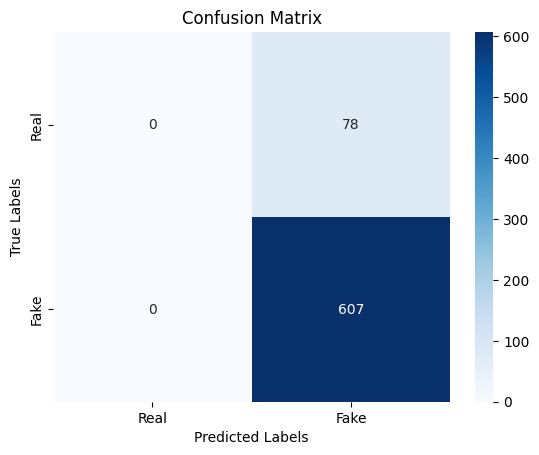

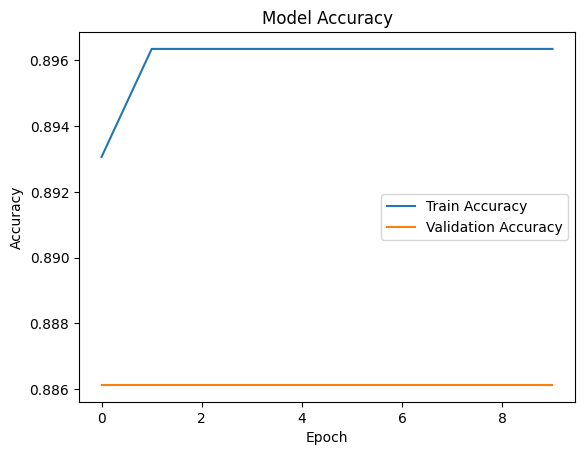

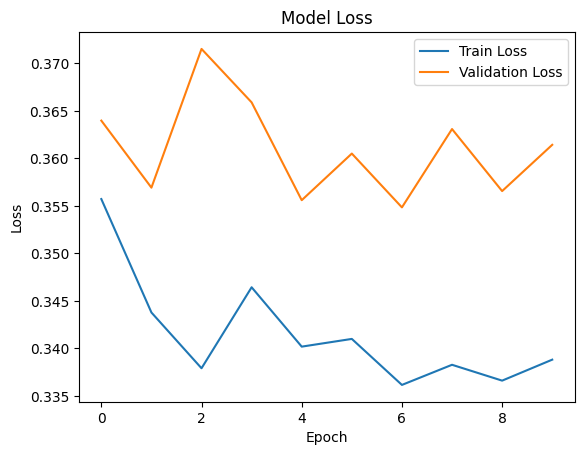

In [35]:
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix
from tensorflow.keras.layers import LSTM, Dense, Dropout, TimeDistributed, Flatten

def createLSTMModel():
    model = Sequential()

    # Flatten the image data for each timestep
    model.add(TimeDistributed(Flatten(), input_shape=(SEQUENCE_LENGTH, IMG_SIZE, IMG_SIZE, 3)))

    # LSTM layer directly processing flattened sequences
    model.add(LSTM(64, return_sequences=False))

    # Dense layers for classification
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(2, activation='softmax'))  # Output layer with 2 classes (real/fake)

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

# Assuming X_train, y_train are prepared
model = createLSTMModel()
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)  # Convert predictions to class labels

# Generate confusion matrix
y_test_classes = y_test.argmax(axis=-1)  # Convert true labels to class labels
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Visualize confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


print the classification report

(None, 10, 32, 32, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted class for the frame: Fake


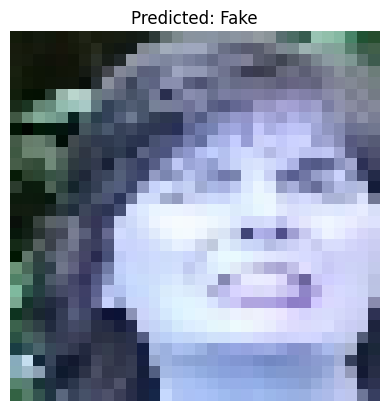

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Predicted class for the frame: Fake


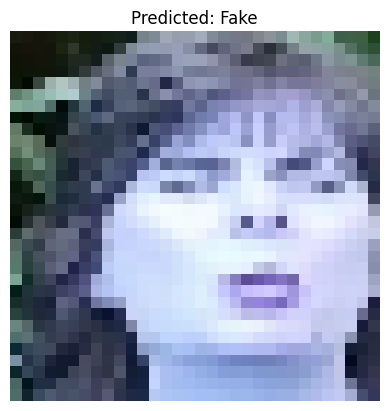

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted class for the frame: Fake


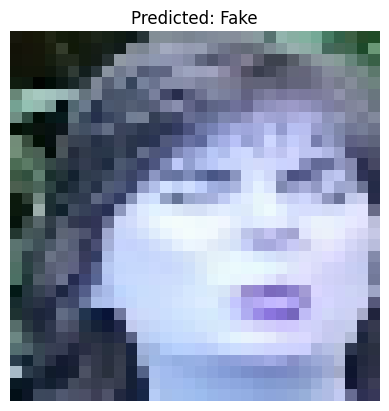

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class for the frame: Fake


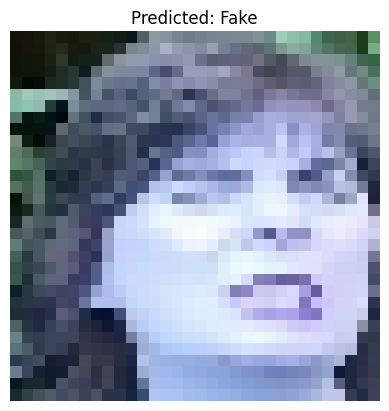

Classification Report:
              precision    recall  f1-score   support

        Real       0.00      0.00      0.00         2
        Fake       0.50      1.00      0.67         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [46]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import tensorflow as tf

print(model.input_shape)


# ----------- Classify a single image extracted from a .mp4 video -----------
def extract_frame_from_video(video_path, frame_number=0, img_size=(64, 64)):
    """
    Extract a single frame from a video file at the specified frame number.
    """
    cap = cv2.VideoCapture(video_path)
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    # Check if the frame number is within the video range
    if frame_number >= frame_count:
        print(f"Error: frame number {frame_number} exceeds the total number of frames in the video.")
        return None

    # Read the frame at the specified frame number
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)
    ret, frame = cap.read()
    cap.release()

    if not ret:
        print("Error: Failed to read frame from video.")
        return None

    # Resize the frame to the desired size
    frame = cv2.resize(frame, img_size)
    frame = frame / 255.0  # Normalize the frame
    return frame

def classify_single_frame(video_path, frame_number=0):
    """
    Classify a single frame extracted from the video.
    """
    # Extract the frame from the video
    frame = extract_frame_from_video(video_path, frame_number, img_size=(32, 32))  # Resize to match model input
    if frame is None:
        return

    # Create a sequence of 10 identical frames
    frame_sequence = np.expand_dims(frame, axis=0)  # Shape: (1, 32, 32, 3)
    frame_sequence = np.repeat(frame_sequence, repeats=10, axis=0)  # Shape: (10, 32, 32, 3)
    frame_sequence = np.expand_dims(frame_sequence, axis=0)  # Shape: (1, 10, 32, 32, 3)

    # Predict the class for the frame sequence
    prediction = model.predict(frame_sequence)
    predicted_class = np.argmax(prediction, axis=-1)

    # Map the predicted class to the corresponding label
    class_labels = ['Real', 'Fake']
    print(f"Predicted class for the frame: {class_labels[predicted_class[0]]}")
    predicted_label = class_labels[predicted_class[0]]

    # Show the frame
    plt.imshow(frame)
    plt.title(f"Predicted: {class_labels[predicted_class[0]]}")
    plt.axis('off')
    plt.show()

    return predicted_class[0], predicted_label

# Example usage: Classify a single frame extracted from a video
video_path = 'download.mp4'  # Provide the path to a video file
frame_numbers = [10, 20, 30, 40]  # List of frame numbers to extract and classify
true_labels = [0, 1, 0, 1]  # Example ground truth (0: Real, 1: Fake)

# List to store predicted labels
predicted_labels = []

# Classify each frame and collect predictions
for frame_number, true_label in zip(frame_numbers, true_labels):
    predicted_class, predicted_label = classify_single_frame(video_path, frame_number)
    if predicted_class is not None:
        predicted_labels.append(predicted_class)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels, target_names=['Real', 'Fake']))


train the model (does not change for either dataset)

observation: the accuracy is much closer and the loss is very less for the .mp4 dataset than for the .png dataset

In [ ]:
# Training the model
# BATCH_SIZE = 16
# EPOCHS = 10

# history = model.fit(
#     X_train, y_train,
#     validation_data=(X_test, y_test),
#     batch_size=BATCH_SIZE,
#     epochs=EPOCHS,
#     verbose=1
# )


Epoch 1/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 84s 454ms/step - accuracy: 0.8837 - loss: 0.3758 - val_accuracy: 0.8934 - val_loss: 0.3405
Epoch 2/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 76s 445ms/step - accuracy: 0.8951 - loss: 0.3449 - val_accuracy: 0.8934 - val_loss: 0.3397
Epoch 3/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 87s 473ms/step - accuracy: 0.9030 - loss: 0.3263 - val_accuracy: 0.8934 - val_loss: 0.3487
Epoch 4/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 75s 437ms/step - accuracy: 0.9024 - loss: 0.3261 - val_accuracy: 0.8934 - val_loss: 0.3436
Epoch 5/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 75s 437ms/step - accuracy: 0.8951 - loss: 0.3424 - val_accuracy: 0.8934 - val_loss: 0.3393
Epoch 6/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 84s 489ms/step - accuracy: 0.8911 - loss: 0.3504 - val_accuracy: 0.8934 - val_loss: 0.3413
Epoch 7/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 76s 442ms/step - accuracy: 0.9017 - loss: 0.3287 - val_accuracy: 0.8934 - val_loss: 0.3433
Epoch 8/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 82s 441ms/step - accuracy: 0.8877 - loss: 0

evaluate the model on a test set (works for both models) --> make changes here

In [37]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8928 - loss: 0.3491
Test Loss: 0.3614266514778137
Test Accuracy: 0.8861314058303833


save the  model (.png dataset)

In [ ]:
# Save the trained model
MODEL_FILE = 'deepfake_lstm_model.h5'
model.save(MODEL_FILE)
print(f"Model saved to '{MODEL_FILE}'")


Model saved to 'deepfake_lstm_model.h5'


save the model (.mp4 dataset)

In [38]:
# Save the trained model
MODEL_FILE = 'deepfake_lstm_model_videos.h5'
model.save(MODEL_FILE)
print(f"Model saved to '{MODEL_FILE}'")

Model saved to 'deepfake_lstm_model_videos.h5'


load the model (for future ref)

In [39]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model(MODEL_FILE)
print("Model loaded successfully!")

# Make predictions
predictions = model.predict(X_test)
predicted_classes = tf.argmax(predictions, axis=1)
print(predicted_classes)


Model loaded successfully!
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
tf.Tensor(
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1

testing the model:

video preprocessing

In [40]:
import cv2
import numpy as np

# Parameters
IMG_SIZE = 32 # Size to resize frames (must match training --> which was 32)
SEQUENCE_LENGTH = 10  # Number of frames per sequence (must match training)

# Function to preprocess a single frame
def preprocess_frame(frame):
    frame = cv2.resize(frame, (IMG_SIZE, IMG_SIZE))  # Resize to 128x128
    frame = frame / 255.0  # Normalize pixel values to [0, 1]
    return frame

# Function to preprocess the video and create sequences
def preprocess_video(video_path, sequence_length=SEQUENCE_LENGTH):
    cap = cv2.VideoCapture(video_path)
    frames = []

    # Read frames from the video
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # Convert to RGB
        frames.append(preprocess_frame(frame))
    cap.release()

    # Convert the frames into sequences
    frames = np.array(frames)
    sequences = []
    for i in range(0, len(frames) - sequence_length + 1, sequence_length):
        sequences.append(frames[i:i + sequence_length])

    return np.array(sequences)

# Example: Preprocess the video
test_video_path = "download.mp4"
test_sequences = preprocess_video(test_video_path)
print(f"Test sequences shape: {test_sequences.shape}")


Test sequences shape: (29, 10, 32, 32, 3)


predict

In [41]:
# Predict using the loaded model
# predictions = model.predict(test_sequences)
# print(test_sequences.shape)
print(test_sequences.shape)
# if test_sequences.size == 0:
#     print("Error: Test sequences are empty!")


# Average the predictions across all sequences
average_prediction = np.mean(predictions, axis=0)

# Interpret the results
if average_prediction[0] > average_prediction[1]:
    print("The video is classified as REAL.")
else:
    print("The video is classified as FAKE.")

# Optional: Print confidence scores
print(f"Confidence scores: REAL={average_prediction[0]:.2f}, FAKE={average_prediction[1]:.2f}")


(29, 10, 32, 32, 3)
The video is classified as FAKE.
Confidence scores: REAL=0.15, FAKE=0.85


# ADD Confusion Matrix, Classification Report, using Test Data single image (show image) input and classify it,  Use additional model (Only LSTM Model)